Name: Pham Nhat Duc

ID: 1624630

Install libraries

In [ ]:
%pip install numpy pandas seaborn matplotlib scikit-learn

Exercixe 1: Principal component analysis

Step 1: Load data

In [1]:
from sklearn.datasets import load_digits
DigitData = load_digits()

X = DigitData.data
Y = DigitData.target

print("Shape of data:", X.shape)

Shape of data: (1797, 64)


Step 2: Run the PCA on the data. Get the first two components

In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Step3: Plot the PCA data with their corresponding labels.

In [4]:
import matplotlib.pyplot as plt

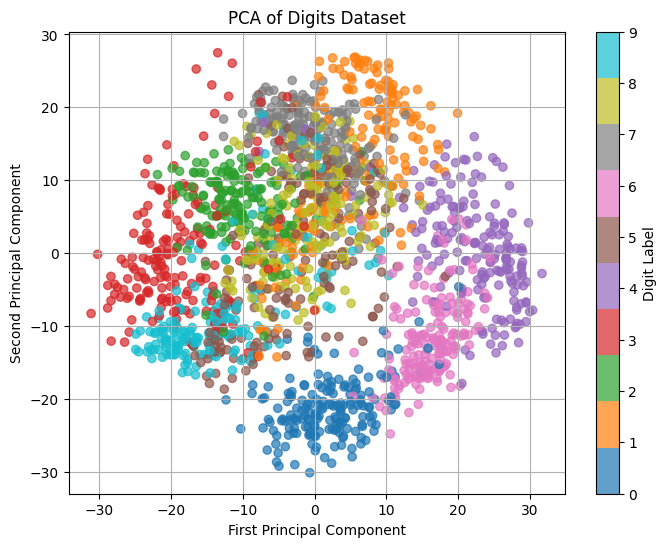

In [5]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Digits Dataset')
plt.grid(True)
plt.show()

Q1. What do you observe ? 

The scatter plot shows clustering of digits in 2D space

Q2. What is the percentage of variance captured by these two components ? 

In [6]:
explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()

print(f"Explained variance by first 2 components: {explained_variance}")
print(f"Total variance captured: {total_variance}")

Explained variance by first 2 components: [0.14890594 0.13618771]
Total variance captured: 0.28509364823699285


Total percentage of useful data is about 28.5%

Q3. Is it sufficient or we should find more components ?

No. Capturing only about 28% of the variance is not sufficient. We need to capture more data, often 90-95% of the variance is needed

Exercise 2: K-mean Clustering 

In [7]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Scale the features

In [8]:
X_scaled = scale(X)

Show the some images with their labels using matplotlib. 

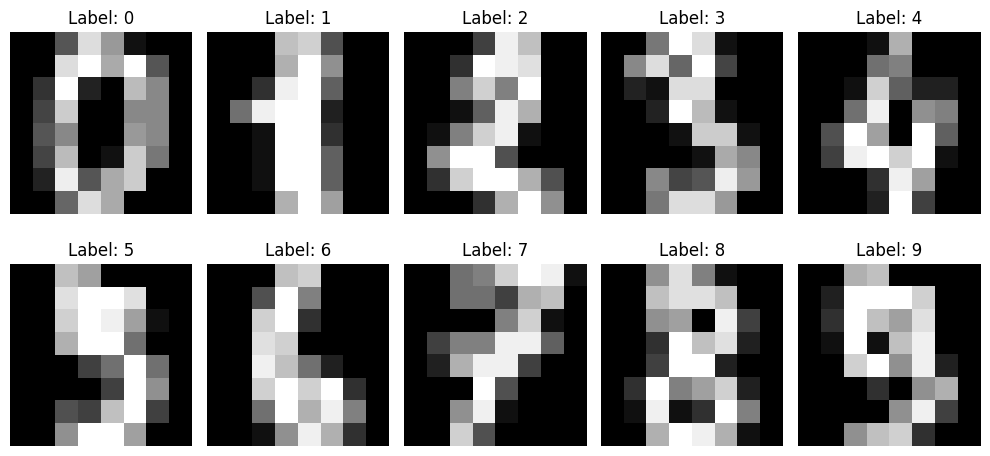

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), DigitData.images, Y):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

Divide the data into training set and test set with testset = 20% of total data. 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Perform clustering

In [11]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans.fit(X_train)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Assign numbering or labels to clusters

In [12]:
train_clusters = kmeans.predict(X_train)
n_clusters = kmeans.n_clusters

# Build mapping from cluster index to actual label
from scipy.stats import mode

labels_map = {}
for i in range(n_clusters):
    mask = (train_clusters == i)
    if np.any(mask):
        labels_map[i] = mode(Y_train[mask], keepdims=False).mode.item()
    else:
        labels_map[i] = None # empty cluster

labels_map

{0: 2, 1: 3, 2: 0, 3: 4, 4: 7, 5: 1, 6: 4, 7: 7, 8: 5, 9: 6}

Test the cluster on the test data set

In [13]:
Y_pred = kmeans.predict(X_test)

# Convert predicted clusters to digit labels using the mapping
Y_pred_mapped = np.array([labels_map[cluster] for cluster in Y_pred])

Print a confusion matrix

In [14]:
cm = confusion_matrix(Y_test, Y_pred_mapped)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  5,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 28,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 29,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  2,  0,  0],
       [ 0,  0,  0, 14,  0, 31,  1,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0, 17,  0,  7,  0,  5,  0,  1,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  6,  0,  0]])

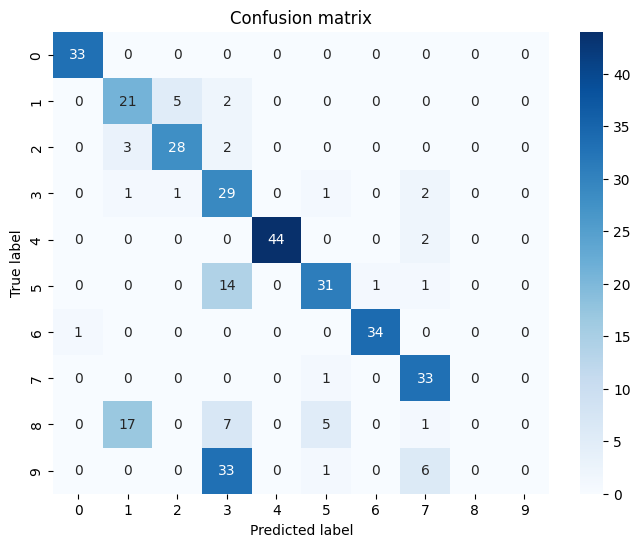

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=DigitData.target_names, yticklabels=DigitData.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

What do you observe ?

K-Means performed quite well overall, especially for digits with unique shapes like 0, 4, 6, 7. However, digits with visually similar patterns like 3, 5, 8, 9 showed significant confusion.